Goal here is to make the inset timeseries, phase plane, and pre-reversal projections

In [1]:
# load our plot stuff
import matplotlib.pyplot as plt

# set up everything correctly for latex figure making
from matplotlib import rc,rcParams
rc('xtick', labelsize=14) 
rc('ytick', labelsize=14)
rc('font',**{'family':'serif','serif':['cmr10']})
# rcParams['mathtext.fontset'] = 'stix'
# rcParams['font.family'] = 'STIXGeneral'
rc('text', usetex=True)
%matplotlib inline

from datetime import datetime
import sys
sys.path.append("/Users/andyreagan/work/2015/08-kitchentabletools/")
from dog.toys import *
import numpy as np

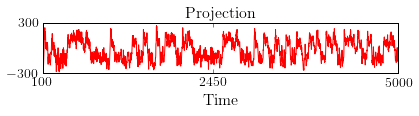

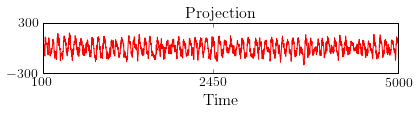

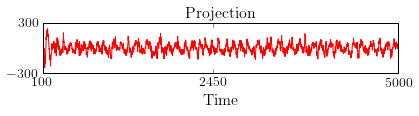

In [22]:
for mode_number in [2,21,79]: # range(1,91):
    mode_timerseries = np.genfromtxt("DMD-mode-projection-{}.csv".format(mode_number),delimiter=",")
    
    textwidth = 510.0 # in pt
    textwidth_in = textwidth/72.27 # in in (on on)
    fig = plt.figure(figsize=(textwidth_in,textwidth_in*.33))
    # changing these doesn't change the figure size
    ax = fig.add_axes([0.2,0.2,0.7,.3])
    ax.plot(np.arange(100,5001,2),mode_timerseries,"r")
    ax.set_xlim(100,500)
    ax.set_xticks([100,2450,5000])
    ax.set_ylim(-300,300)
    ax.set_yticks([-300,300])
    ax.set_xlabel("Time",fontsize=16)
    ax.set_title("Projection",fontsize=16)
    mysavefig("DMD-mode-projection-{}-timeseries.pdf".format(mode_number))

In [28]:
reversal_times = np.genfromtxt("DMD-reversal-times.csv",delimiter=",")

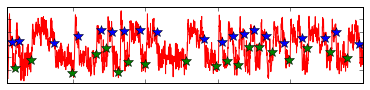

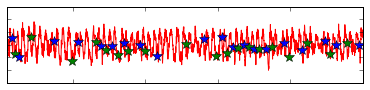

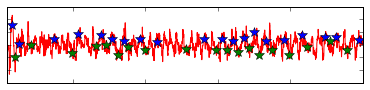

In [36]:
for mode_number in [2,21,79]: # range(1,91):
    mode_timeseries = np.genfromtxt("DMD-mode-projection-{}.csv".format(mode_number),delimiter=",")
    
    textwidth = 510.0 # in pt
    textwidth_in = textwidth/72.27 # in in (on on)
    fig = plt.figure(figsize=(textwidth_in,textwidth_in*.5))
    # changing these doesn't change the figure size
    ax = fig.add_axes([0.2,0.2,0.7,.3])
    ax.plot(np.arange(100,5001,2),mode_timeseries,"r")
    for i in range(len(reversal_times)):
        if np.mod(i,2) == 0:
            ax.plot(reversal_times[i],mode_timeseries[(reversal_times[i]-101)/2-1],"*",markersize=10,color="b",label="CW")
        else:
            ax.plot(reversal_times[i],mode_timeseries[(reversal_times[i]-101)/2-1],"*",markersize=10,color="g",label="CCW")
    ax.set_xlim(100,5000)
    ax.set_xticklabels([])
    ax.set_ylim(-300,300)
    ax.set_yticklabels([])
    mysavefig("DMD-mode-projection-{}-timeseries.pdf".format(mode_number))

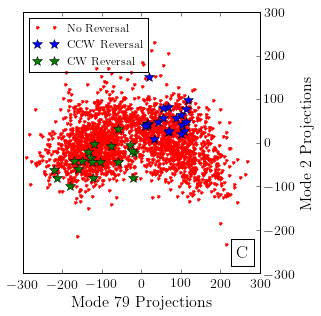

In [57]:
textwidth = 510.0*2/3 # in pt
textwidth_in = textwidth/72.27 # in in (on on)
fig = plt.figure(figsize=(textwidth_in,textwidth_in))
# changing these doesn't change the figure size
ax = fig.add_axes([0.2,0.2,0.7,.77])

mode1 = 2
mode2 = 79
mode1_timseries = np.genfromtxt("DMD-mode-projection-{}.csv".format(mode1),delimiter=",")
mode2_timseries = np.genfromtxt("DMD-mode-projection-{}.csv".format(mode2),delimiter=",")
ax.plot(mode1_timseries,mode2_timseries,"r.")
for i in range(len(reversal_times)):
    if np.mod(i,2) == 0:
        ax.plot(mode1_timseries[(reversal_times[i]-101)/2-1],mode2_timseries[(reversal_times[i]-101)/2-1],"*",markersize=10,color="b",label="CW")
    else:
        ax.plot(mode1_timseries[(reversal_times[i]-101)/2-1],mode2_timseries[(reversal_times[i]-101)/2-1],"*",markersize=10,color="g",label="CCW")
        

# plot(all_projects[:,mode1][(reversal_times-101)/2],all_projects[:,mode2][(reversal_times-101)/2],"*",markersize=15)
# ax.yaxis.tick_right()
ax.set_ylabel("Mode {} Projections".format(mode1),fontsize=16)
ax.set_xlabel("Mode {} Projections".format(mode2),fontsize=16)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.legend(["No Reversal","CCW Reversal","CW Reversal"],loc=2,fontsize=12)

props = dict(boxstyle='square', facecolor='white', alpha=1.0)
ax.text(270, -270, "C",
        fontsize=18,
        verticalalignment='bottom',
        horizontalalignment='right',
        bbox=props)

mysavefig("DMD-mode-{}-{}-phaseplane.pdf".format(2,79))

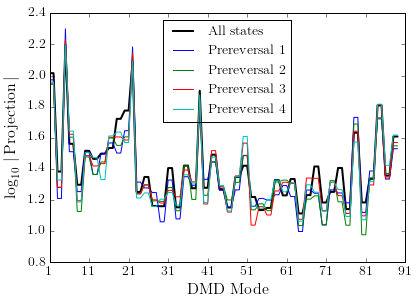

In [67]:
textwidth = 510.0 # in pt
textwidth_in = textwidth/72.27 # in in (on on)
fig = plt.figure(figsize=(textwidth_in,textwidth_in*.7))
# changing these doesn't change the figure size
ax = fig.add_axes([0.2,0.2,0.7,0.7])
a = np.genfromtxt("DMD-projections-all-states.csv",delimiter=",")
ax.plot(a,"k",label="All states",linewidth=2)


a = np.genfromtxt("DMD-projections-prereversal-1.csv",delimiter=",")
ax.plot(a,label="Prereversal 1")

a = np.genfromtxt("DMD-projections-prereversal-2.csv",delimiter=",")
ax.plot(a,label="Prereversal 2")

a = np.genfromtxt("DMD-projections-prereversal-3.csv",delimiter=",")
ax.plot(a,label="Prereversal 3")

a = np.genfromtxt("DMD-projections-prereversal-4.csv",delimiter=",")
ax.plot(a,label="Prereversal 4")

ax.set_ylabel(r"$\log_{10}\,|\,$Projection$\,|$",fontsize=16)
ax.set_xlabel("DMD Mode",fontsize=16)
ax.legend(loc="best",fontsize=14)
ax.set_xticks([i*10 for i in range(10)])
ax.set_xticklabels([i*10+1 for i in range(10)])
mysavefig("DMD_modes_pre_reversals.pdf")